In [609]:
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
from PIL import ImageEnhance
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [610]:
image_input = "qwerty.jpg" #best.jpg;check.jpg;qwerty.jpg;text.jpg

In [611]:
img_save = "filtered.jpg"

In [612]:
from PIL import Image, ImageEnhance 
im = Image.open(image_input)
enhancer = ImageEnhance.Color(im)
enhanced_im = enhancer.enhance(0.0)

enhancer = ImageEnhance.Sharpness(enhanced_im)
enhanced_im = enhancer.enhance(2.0)

enhancer = ImageEnhance.Contrast(enhanced_im)
enhanced_im = enhancer.enhance(0.5)

enhancer = ImageEnhance.Brightness(enhanced_im)
enhanced_im = enhancer.enhance(1.5)

enhancer = ImageEnhance.Contrast(enhanced_im)
enhanced_im = enhancer.enhance(2.0)

enhanced_im.save(img_save)

In [613]:
img = cv2.imread(img_save, -1)

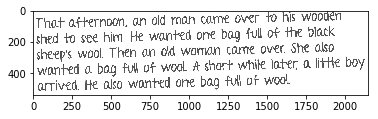

In [614]:
plt.imshow(img)

In [615]:
img = cv2.GaussianBlur(img,(5,5),0)

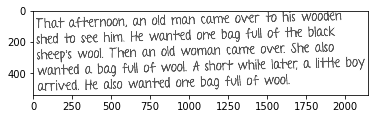

In [616]:
plt.imshow(img)

In [617]:
size_tup = img.shape


In [618]:
b,g,r = cv2.split(img)

In [619]:
img2 = cv2.merge([r,g,b])

In [620]:
my_mask= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [621]:
img3 = img

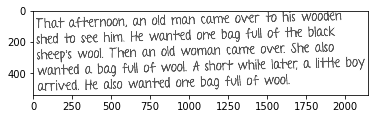

In [622]:
plt.imshow(img2)

In [623]:
print (size_tup)

(538, 2146, 3)


In [624]:
sum = 0.0
sq_sum = 0.0
count = 0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        for k in range(size_tup[2]):
            if(img[i][j][k] != 0):
                sum = sum + ((img3[i][j][k]))
                sq_sum = sq_sum + img3[i][j][k]
                count = count + 1

root_mean_sqr = math.sqrt(sq_sum/count)               
mean = (sum / (count))
avg = mean - root_mean_sqr
print (avg)

214.90094191137493


In [625]:
BLACK = 255
WHITE = 0
i = size_tup[0] - 1
while i >= 0:
    j = size_tup[1] - 1
    while j >= 0:
        if my_mask[i][j] == BLACK or my_mask[i][j] == WHITE:
            j = j - 1
            continue
        elif my_mask[i][j] > avg:
            my_mask[i][j] = BLACK
        else:
            my_mask[i][j] = WHITE
        j = j - 1
    i = i - 1
    
print (i)

-1


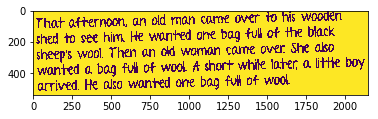

In [626]:
plt.imshow(my_mask)

In [627]:
BLACK = 0
WHITE = 255
i = size_tup[0] - 1
while i >= 0:
    j = size_tup[1] - 1
    while j >= 0:
        k = size_tup[2] - 1
        while k >= 0:
            if my_mask[i][j] == BLACK:
                img3[i][j][k] = BLACK
            else:
                img3[i][j][k] = img2[i][j][k]
            k = k - 1
        j = j - 1
    i = i - 1
    
print (i)

-1


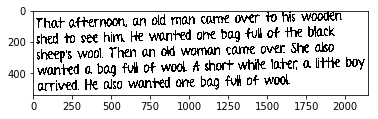

In [628]:
plt.imshow(img3)

In [629]:
print(pytesseract.image_to_string(img3))

That afternoon, an old man came over to his wooden
shed to see him. He wanted one bag full of the black
sheep’s wool. Then an old woman came Over She also
wanted a bag full of wool. A short white later, a litte boy
arrived. He also wanted one bag full of wool.


In [630]:
strout = pytesseract.image_to_string(img)

In [631]:
print(strout)

That afternoon, an old man came over to his wooden
shed to see him. He wanted one bag full of the black
sheep’s wool. Then an old woman came Over She also
wanted a bag full of wool. A short white later, a litte boy
arrived. He also wanted one bag full of wool.


In [632]:
file = open('textoutput.txt','w') 
file.write(strout)  
file.close()